In [16]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Select features for clustering
X = iris.drop('class', axis=1)

# Choose the number of clusters (e.g., 3 for the Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



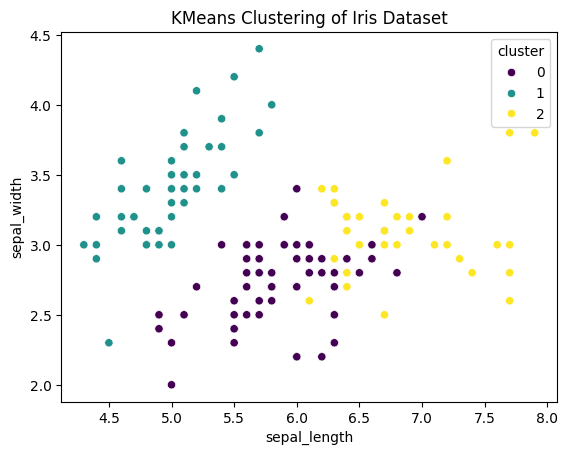

In [18]:
# Visualize the clusters
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=iris, palette='viridis')
plt.title('KMeans Clustering of Iris Dataset')
plt.show()


In [19]:
# Import additional libraries
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
iris['dbscan_cluster'] = dbscan.fit_predict(X)

# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
iris['agg_cluster'] = agg_cluster.fit_predict(X)


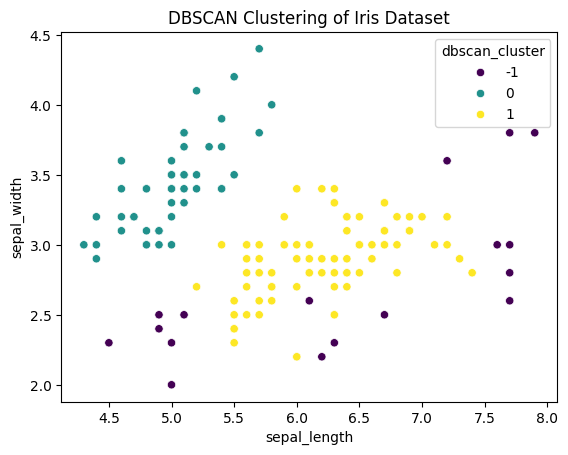

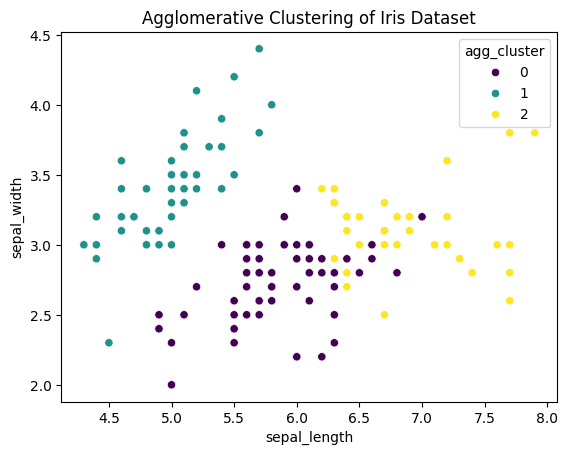

In [20]:
# Visualize the DBSCAN clusters
sns.scatterplot(x='sepal_length', y='sepal_width', hue='dbscan_cluster', data=iris, palette='viridis')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()

# Visualize the Agglomerative Hierarchical Clustering clusters
sns.scatterplot(x='sepal_length', y='sepal_width', hue='agg_cluster', data=iris, palette='viridis')
plt.title('Agglomerative Clustering of Iris Dataset')
plt.show()


In [21]:
# Import necessary libraries
from sklearn.decomposition import PCA
import plotly.express as px

# Apply PCA for 3D visualization
pca = PCA(n_components=3)
iris_3d = pca.fit_transform(X)

# Add the cluster labels to the dataframe
iris['cluster_3d'] = kmeans.fit_predict(X)

# Visualize the clusters in 3D
fig = px.scatter_3d(iris, x=iris_3d[:, 0], y=iris_3d[:, 1], z=iris_3d[:, 2], color='cluster_3d',
                    labels={'cluster_3d': 'Cluster'},
                    title='KMeans Clustering in 3D for Iris Dataset')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [22]:
# Visualize the DBSCAN clusters in 3D
iris['dbscan_cluster_3d'] = dbscan.fit_predict(X)
fig_dbscan = px.scatter_3d(iris, x=iris_3d[:, 0], y=iris_3d[:, 1], z=iris_3d[:, 2], color='dbscan_cluster_3d',
                           labels={'dbscan_cluster_3d': 'DBSCAN Cluster'},
                           title='DBSCAN Clustering in 3D for Iris Dataset')
fig_dbscan.show()

# Visualize the Agglomerative Hierarchical Clustering clusters in 3D
iris['agg_cluster_3d'] = agg_cluster.fit_predict(X)
fig_agg = px.scatter_3d(iris, x=iris_3d[:, 0], y=iris_3d[:, 1], z=iris_3d[:, 2], color='agg_cluster_3d',
                        labels={'agg_cluster_3d': 'Agglomerative Cluster'},
                        title='Agglomerative Clustering in 3D for Iris Dataset')
fig_agg.show()


In [25]:
# Display the number of features and rows in the dataset
num_features = len(X.columns)
num_rows = len(X)

print(f"Number of Features in the dataset: {num_features}")
print(f"Number of rows in the dataset: {num_rows}")


Number of Features in the dataset: 4
Number of rows in the dataset: 150


In [23]:
from sklearn.metrics import silhouette_score

# Function to calculate silhouette score
def calculate_silhouette_score(data, algorithm, clusters):
    labels = algorithm.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

# Apply KMeans clustering
kmeans_silhouette = calculate_silhouette_score(X, kmeans, kmeans.n_clusters)

# Apply DBSCAN clustering
dbscan_silhouette = calculate_silhouette_score(X, dbscan, dbscan.labels_)

# Apply Agglomerative Hierarchical Clustering
agg_silhouette = calculate_silhouette_score(X, agg_cluster, agg_cluster.labels_)

# Display silhouette scores
print(f"Silhouette Score for KMeans: {kmeans_silhouette}")
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")
print(f"Silhouette Score for Agglomerative Clustering: {agg_silhouette}")

# Determine the best clustering algorithm and number of clusters
best_algorithm = max({"KMeans": kmeans_silhouette, "DBSCAN": dbscan_silhouette, "Agglomerative": agg_silhouette}.items(), key=lambda x: x[1])[0]
best_clusters = kmeans.n_clusters if best_algorithm == "KMeans" else dbscan.components_.shape[0] if best_algorithm == "DBSCAN" else agg_cluster.n_clusters

print(f"Best Clustering Algorithm: {best_algorithm}")
print(f"Best Number of Clusters: {best_clusters}")
print(f"Best Silhouette Score: {max(kmeans_silhouette, dbscan_silhouette, agg_silhouette)}")


Silhouette Score for KMeans: 0.5525919445499757
Silhouette Score for DBSCAN: 0.485842354600955
Silhouette Score for Agglomerative Clustering: 0.5540972908150553
Best Clustering Algorithm: Agglomerative
Best Number of Clusters: 3
Best Silhouette Score: 0.5540972908150553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

